In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
# Будем использовать только обучающую выборку
data = pd.read_csv('flight.csv')

In [ ]:
# размер набора данных
data.shape

(851, 14)

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Food and drink,Seat comfort,Baggage handling,Departure Delay,Arrival Delay,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,3,3,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,5,5,4,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,2,3,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,3,4,1,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,4,2,2,0,20.0,satisfied


In [ ]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Unnamed: 0', ('int64', 0)),
 ('id', ('int64', 0)),
 ('Gender', ('object', 0)),
 ('Customer Type', ('object', 0)),
 ('Age', ('int64', 0)),
 ('Type of Travel', ('object', 0)),
 ('Class', ('object', 0)),
 ('Flight Distance', ('int64', 0)),
 ('Food and drink', ('int64', 0)),
 ('Seat comfort', ('int64', 0)),
 ('Baggage handling', ('int64', 0)),
 ('Departure Delay', ('int64', 0)),
 ('Arrival Delay', ('float64', 2)),
 ('satisfaction', ('object', 0))]

In [ ]:
# Используем некоторые признаки
cols_filter = ['id', 'Gender', 'Age', 'Class', 'Flight Distance',
        'Seat comfort', 'Arrival Delay', 'satisfaction']
data = data[cols_filter]
data.head()

,id,Gender,Age,Class,Flight Distance,Seat comfort,Arrival Delay,satisfaction
0,19556,Female,52,Eco,160,3,44.0,satisfied
1,90035,Female,36,Business,2863,5,0.0,satisfied
2,12360,Male,20,Eco,192,2,0.0,neutral or dissatisfied
3,77959,Male,44,Business,3377,4,6.0,satisfied
4,36875,Female,49,Eco,1182,2,20.0,satisfied


In [ ]:
# Заполним пропуски
data.dropna(subset=['Flight Distance', 'Arrival Delay'], inplace=True)

In [ ]:
# От каюты оставляет только первую букву 
# и убираем каюты типа Т так как их мало
data['Arrival Delay'] = data['Arrival Delay'].astype(str).str[0]
data = data[data['Arrival Delay'] != '0']

In [ ]:
# Убедимся что нет пустых значений
data.isnull().sum()

id                 0
Gender             0
Age                0
Class              0
Flight Distance    0
Seat comfort       0
Arrival Delay      0
satisfaction       0
dtype: int64

**LABEl ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Gender'])
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
np.unique(cat_enc_le)

array([0, 1])

In [ ]:
le.inverse_transform([0, 1])

array(['Female', 'Male'], dtype=object)

In [ ]:
data['Gender']=le.fit_transform(data['Gender'])

In [ ]:
data.head()

,id,Gender,Age,Class,Flight Distance,Seat comfort,Arrival Delay,satisfaction
0,19556,0,52,Eco,160,3,4,satisfied
3,77959,1,44,Business,3377,4,6,satisfied
4,36875,0,49,Eco,1182,2,2,satisfied
7,97286,0,43,Business,2556,5,6,satisfied
9,62482,0,46,Business,1744,4,1,satisfied


**ONE HOT CODING**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['Class']])
cat_enc_ohe

<365x3 sparse matrix of type '<class 'numpy.float64'>'
	with 365 stored elements in Compressed Sparse Row format>

In [ ]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [ ]:
pd.get_dummies(data[['Class']]).head()

,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,0
3,1,0,0
4,0,1,0
7,1,0,0
9,1,0,0


In [ ]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(data[['Class']], dummy_na=True).head()

,Class_Business,Class_Eco,Class_Eco Plus,Class_nan
0,0,1,0,0
3,1,0,0,0
4,0,1,0,0
7,1,0,0,0
9,1,0,0,0


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.3 MB/s eta 0:00:00


In [ ]:
from category_encoders.one_hot import OneHotEncoder as ce_OneHotEncoder
ce_OneHotEncoder1 = ce_OneHotEncoder()
data_OHE = ce_OneHotEncoder1.fit_transform(data[data.columns.difference(['Gender'])])
data_OHE

,Age,Arrival Delay_1,Arrival Delay_2,Arrival Delay_3,Arrival Delay_4,Arrival Delay_5,Arrival Delay_6,Arrival Delay_7,Arrival Delay_8,Arrival Delay_9,Class_1,Class_2,Class_3,Flight Distance,Seat comfort,id,satisfaction_1,satisfaction_2
0,52,1,0,0,0,0,0,0,0,0,1,0,0,160,3,19556,1,0
3,44,0,1,0,0,0,0,0,0,0,0,1,0,3377,4,77959,1,0
4,49,0,0,1,0,0,0,0,0,0,1,0,0,1182,2,36875,1,0
7,43,0,1,0,0,0,0,0,0,0,0,1,0,2556,5,97286,1,0
9,46,0,0,0,1,0,0,0,0,0,0,1,0,1744,4,62482,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,53,0,0,1,0,0,0,0,0,0,0,1,0,3648,2,122646,0,1
843,35,0,0,0,1,0,0,0,0,0,1,0,0,689,1,103577,0,1
845,65,0,0,0,1,0,0,0,0,0,1,0,0,2342,2,129555,0,1
848,37,0,0,0,0,0,0,0,1,0,1,0,0,173,3,19580,0,1


**Count (frequency) encoding**

In [ ]:
from category_encoders.count import CountEncoder as ce_CountEncoder
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['Gender'])])
data_COUNT_ENC

,Age,Arrival Delay,Class,Flight Distance,Seat comfort,id,satisfaction
0,52,49,167,160,3,19556,153
3,44,25,170,3377,4,77959,153
4,49,60,167,1182,2,36875,153
7,43,25,170,2556,5,97286,153
9,46,117,170,1744,4,62482,153
...,...,...,...,...,...,...,...
839,53,60,170,3648,2,122646,212
843,35,117,167,689,1,103577,212
845,65,117,167,2342,2,129555,212
848,37,16,167,173,3,19580,212


In [ ]:
data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [ ]:
data_COUNT_ENC['Class'].unique()

array([167, 170,  28])

In [ ]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['Gender'])])
data_FREQ_ENC

,Age,Arrival Delay,Class,Flight Distance,Seat comfort,id,satisfaction
0,52,0.134247,0.457534,160,3,19556,0.419178
3,44,0.068493,0.465753,3377,4,77959,0.419178
4,49,0.164384,0.457534,1182,2,36875,0.419178
7,43,0.068493,0.465753,2556,5,97286,0.419178
9,46,0.320548,0.465753,1744,4,62482,0.419178
...,...,...,...,...,...,...,...
839,53,0.164384,0.465753,3648,2,122646,0.580822
843,35,0.320548,0.457534,689,1,103577,0.580822
845,65,0.320548,0.457534,2342,2,129555,0.580822
848,37,0.043836,0.457534,173,3,19580,0.580822


In [ ]:
data_FREQ_ENC['Class'].unique()

array([0.45753425, 0.46575342, 0.07671233])

**Helmert encoding**

In [ ]:
from category_encoders.helmert import HelmertEncoder as ce_HelmertEncoder
ce_HelmertEncoder1 = ce_HelmertEncoder()
data_HELM_ENC = ce_HelmertEncoder1.fit_transform(data[data.columns.difference(['Gender'])], data['Gender'])
data_HELM_ENC

/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,Age,Arrival Delay_0,Arrival Delay_1,Arrival Delay_2,Arrival Delay_3,Arrival Delay_4,Arrival Delay_5,Arrival Delay_6,Arrival Delay_7,Class_0,Class_1,Flight Distance,Seat comfort,id,satisfaction_0
0,1,52,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,160,3,19556,-1.0
3,1,44,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,3377,4,77959,-1.0
4,1,49,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1182,2,36875,-1.0
7,1,43,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,2556,5,97286,-1.0
9,1,46,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1744,4,62482,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,53,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,3648,2,122646,1.0
843,1,35,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,689,1,103577,1.0
845,1,65,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2342,2,129555,1.0
848,1,37,0.0,0.0,0.0,0.0,0.0,0.0,7.0,-1.0,-1.0,-1.0,173,3,19580,1.0


In [ ]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
clas_models_dict = {'LogR': LogisticRegression(max_iter=1000), 
                    'KNN_5':KNeighborsClassifier(n_neighbors=5),
                    'Tree':DecisionTreeClassifier(),
                    'GB': GradientBoostingClassifier(),
                    'RF':RandomForestClassifier(n_estimators=50, random_state=1, max_depth=3)}

In [ ]:
X_data_dict = {'One-Hot encoding': data_OHE, 
               'Count encoding': data_COUNT_ENC,
               'Frequency encoding': data_FREQ_ENC, 
               'Helmert encoding': data_HELM_ENC}

In [ ]:
def test_models(clas_models_dict, X_data_dict, y_data):
    
    logger = MetricLogger()
    
    for model_name, model in clas_models_dict.items():
        
        for data_name, X_data in X_data_dict.items():
    
            X_train, X_test, y_train, y_test = train_test_split(
                X_data, y_data, test_size=0.3, random_state=1)
        
            model.fit(X_train, y_train)
            pred1 = model.predict_proba(X_train)
            pred2 = model.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, pred2[:, 1])
            logger.add(model_name, data_name, roc_auc)
            
    return logger

In [ ]:
%%time
logger = test_models(clas_models_dict, X_data_dict, data['Gender'])

CPU times: user 1.4 s, sys: 156 ms, total: 1.55 s
Wall time: 1.58 s


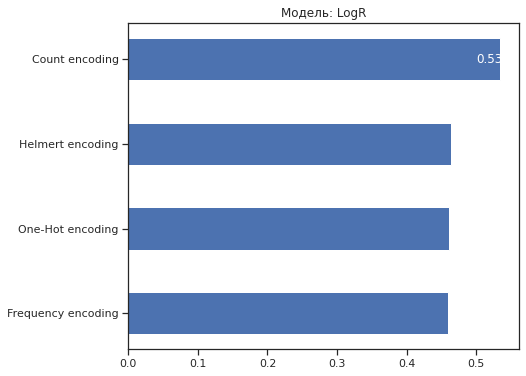

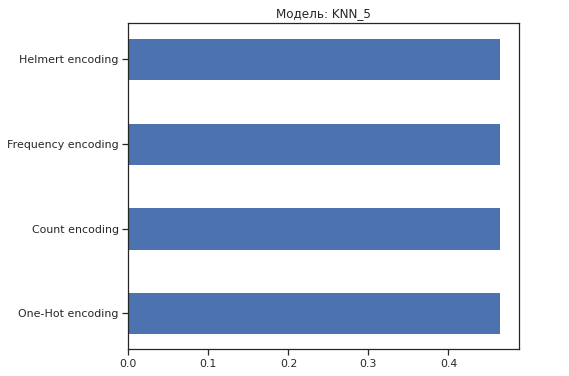

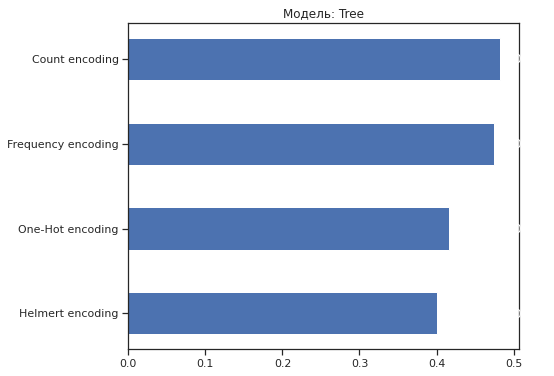

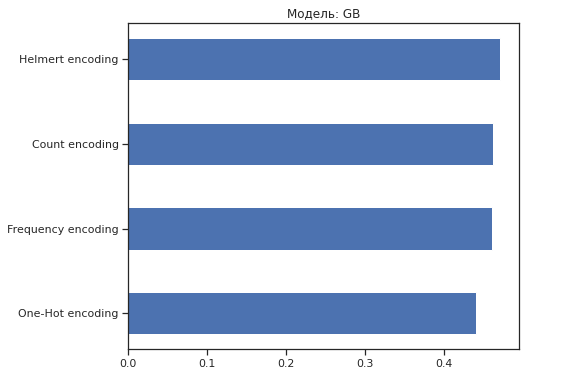

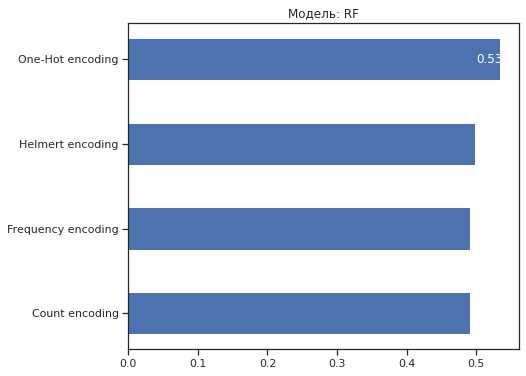

In [ ]:
# Построим графики метрик качества модели
for model in clas_models_dict:
    logger.plot('Модель: ' + model, model, figsize=(7, 6))